In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale , StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
df=pd.read_csv(r"C:\Users\Onur\Desktop\Turkcell_MachineLearning\diabetes.csv")
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=42)

# MODEL TAHMİN

In [3]:
!pip install catboost

In [4]:
from catboost import CatBoostClassifier

In [5]:
catb_model=CatBoostClassifier().fit(X_train,y_train, verbose=False) #verbose koymamızın sebebi fonksiyonun çıktısında sürekli her iterasyona ilişkin bilgi paaylaşımı vardı. bu bilgiyi istemediğimiz için verdik

In [9]:
?catb_model

Type:            CatBoostClassifier
String form:     <catboost.core.CatBoostClassifier object at 0x00000174B3ACC040>
File:            c:\users\onur\anaconda3\envs\test_conda_env\lib\site-packages\catboost\core.py
Docstring:       <no docstring>
Class docstring: CatBoost model. Contains training, prediction and evaluation methods.
Init docstring: 
Initialize the CatBoost.

Parameters
----------
params : dict
    Parameters for CatBoost.
    If  None, all params are set to their defaults.
    If  dict, overriding parameters present in dict.


In [7]:
y_pred=catb_model.predict(X_test)

In [8]:
accuracy_score(y_test,y_pred)

0.7402597402597403

# MODEL TUNİNG

In [10]:
catb=CatBoostClassifier()

In [11]:
catb_params={'iterations':[200,500,1000],    #ağaç sayısıyla ilgili parametre denilebilir
            'learning_rate': [0.03,0.01,0.1],
            'depth':[4,5,8]}

In [13]:
catb_cv_model=GridSearchCV(catb,catb_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  3.5min finished


0:	learn: 0.6730562	total: 6.94ms	remaining: 1.38s
1:	learn: 0.6583303	total: 12.5ms	remaining: 1.23s
2:	learn: 0.6413852	total: 19.3ms	remaining: 1.27s
3:	learn: 0.6268405	total: 24.2ms	remaining: 1.19s
4:	learn: 0.6150883	total: 29.1ms	remaining: 1.14s
5:	learn: 0.5989093	total: 35.3ms	remaining: 1.14s
6:	learn: 0.5861303	total: 41.1ms	remaining: 1.13s
7:	learn: 0.5735117	total: 47.6ms	remaining: 1.14s
8:	learn: 0.5616370	total: 53.5ms	remaining: 1.14s
9:	learn: 0.5507706	total: 59.3ms	remaining: 1.13s
10:	learn: 0.5388394	total: 67ms	remaining: 1.15s
11:	learn: 0.5264516	total: 72.9ms	remaining: 1.14s
12:	learn: 0.5191660	total: 81.3ms	remaining: 1.17s
13:	learn: 0.5104459	total: 87.1ms	remaining: 1.16s
14:	learn: 0.5017018	total: 93.5ms	remaining: 1.15s
15:	learn: 0.4954928	total: 100ms	remaining: 1.15s
16:	learn: 0.4896817	total: 106ms	remaining: 1.14s
17:	learn: 0.4808546	total: 112ms	remaining: 1.13s
18:	learn: 0.4724010	total: 118ms	remaining: 1.12s
19:	learn: 0.4657244	total: 

In [14]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.03}

In [15]:
catb_tuned=CatBoostClassifier(iterations=200,learning_rate=0.03,depth=8).fit(X_train,y_train)

0:	learn: 0.6730562	total: 8.01ms	remaining: 1.59s
1:	learn: 0.6583303	total: 14.4ms	remaining: 1.43s
2:	learn: 0.6413852	total: 21.4ms	remaining: 1.41s
3:	learn: 0.6268405	total: 28.6ms	remaining: 1.4s
4:	learn: 0.6150883	total: 34.1ms	remaining: 1.33s
5:	learn: 0.5989093	total: 39.8ms	remaining: 1.29s
6:	learn: 0.5861303	total: 45.5ms	remaining: 1.25s
7:	learn: 0.5735117	total: 51ms	remaining: 1.22s
8:	learn: 0.5616370	total: 57ms	remaining: 1.21s
9:	learn: 0.5507706	total: 62.5ms	remaining: 1.19s
10:	learn: 0.5388394	total: 68.1ms	remaining: 1.17s
11:	learn: 0.5264516	total: 72.8ms	remaining: 1.14s
12:	learn: 0.5191660	total: 77.4ms	remaining: 1.11s
13:	learn: 0.5104459	total: 82ms	remaining: 1.09s
14:	learn: 0.5017018	total: 86.5ms	remaining: 1.07s
15:	learn: 0.4954928	total: 91ms	remaining: 1.05s
16:	learn: 0.4896817	total: 95.9ms	remaining: 1.03s
17:	learn: 0.4808546	total: 101ms	remaining: 1.02s
18:	learn: 0.4724010	total: 106ms	remaining: 1.01s
19:	learn: 0.4657244	total: 111ms

In [16]:
y_pred=catb_tuned.predict(X_test)

In [18]:
accuracy_score(y_test,y_pred)

0.7489177489177489

# Değişken Önem Düzeyi

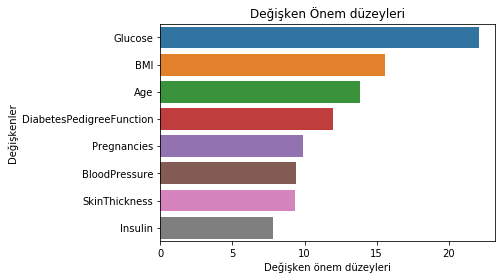

In [19]:
features_imp=pd.Series(catb_tuned.feature_importances_,
                      index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=features_imp,y=features_imp.index)
plt.xlabel('Değişken önem düzeyleri')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem düzeyleri')
plt.show()